In [7]:
import numpy as np
from astropy.io import fits
from photutils import datasets
from photutils import DAOStarFinder
from astropy.stats import mad_std
hdu = datasets.load_star_image()    
image = fits.getdata('/Users/allyw/Astro 480/Data_Reduction/quadRU.fits').astype(float)    
image -= np.median(image) 

In [28]:
>>> import numpy as np
>>> from photutils import aperture_photometry
>>> phot_table = aperture_photometry(image, apertures)
>>> phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
>>> print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1    10.0    10.0   -369.06651
  2    80.0    80.0   -294.43544


In [29]:
bkg_sigma = mad_std(image)    
daofind = DAOStarFinder(fwhm=4., threshold=3.*bkg_sigma)    
sources = daofind(image)    
for col in sources.colnames:  
     sources[col].info.format = '%.8g'  # for consistent table output
print(sources) 

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag    
--- --------- --------- ---------- ... --- --------- --------- -----------
  1 190.99435  1.890389 0.30107286 ...   0 118.78454 1.7433346 -0.60345187
  2 561.29745 1.0560092 0.31790962 ...   0 61136.584 1000.3693  -7.5004009
  3 1025.5135 1.5341774 0.44560334 ...   0 29096.192 542.92308  -6.8368458
  4 565.10978  4.110159 0.24449333 ...   0 60356.721 721.55518  -7.1456739
  5 633.88727 5.7229432 0.65108982 ...   0 152.10468 1.3825245 -0.35168206
  6 111.56587 8.8270582 0.36146805 ...   0 134.00775 1.5546735 -0.47909801
  7 172.86663 24.843851 0.39602069 ...   0 3606.4192 42.190782  -4.0630439
  8 587.59378 36.751537 0.43103539 ...   0 1893.5643 20.101052   -3.258047
  9 964.47372 39.078154 0.62842616 ...   0 126.74932 1.1032781 -0.10671251
 10 550.59563 40.522206 0.46177694 ...   0 488.52975 5.0092388  -1.7494293
...       ...       ...        ... ... ...       ...       ...         ...
255 758.40639 981.66351 0

In [39]:
>>> from photutils import CircularAperture
>>> positions = [sources['xcentroid'],sources['ycentroid']]
>>> apertures = CircularAperture(positions, r=1.)

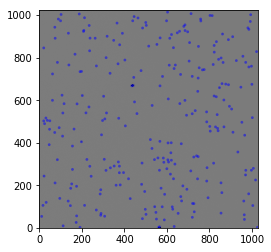

In [49]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [50]:
annulus_apertures = CircularAnnulus(positions, r_in=6., r_out=8.)
apers = [apertures, annulus_apertures]
phot_table = aperture_photometry(image, apers)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
    print(phot_table)


 id      xcenter            ycenter         aperture_sum_0      aperture_sum_1  
           pix                pix                                               
--- ------------------ ------------------ ------------------ -------------------
  1 190.99435082792877 1.8903889608033366  2130.175364041018  -388.2795483994501
  2  561.2974457616049  1.056009230660741 1234281.8112481353   872724.1131327613
  3  1025.513534648752 1.5341774390751564  287287.5554833538  117861.72266019181
  4  565.1097789679757  4.110159006303768 1489083.0396711966   576995.4155681651
  5  633.8872662961309  5.722943172538966  2276.033006318657    854.018309030693
  6 111.56587334609034    8.8270582481562   2276.34855411841 -458.59204457217663
  7 172.86662561407712 24.843851416988482 57335.615032236456  3854.3403701162256
  8  587.5937806506138  36.75153696032994  31083.97782322658  3635.3929754259157
  9  964.4737170855254 39.078154253464696 1908.1214459770472  1332.9377271849962
 10  550.5956282416972 40.52

In [51]:
>>> from photutils import CircularAnnulus
>>> apertures = CircularAperture(positions, r=3)
>>> annulus_apertures = CircularAnnulus(positions, r_in=6., r_out=8.)

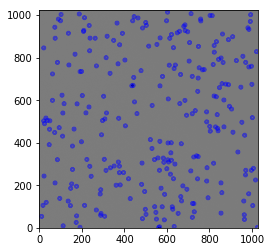

In [52]:
plt.imshow(image, cmap='gray_r', origin='lower')
annulus_apertures.plot(color='blue', lw=1.5, alpha=0.5)

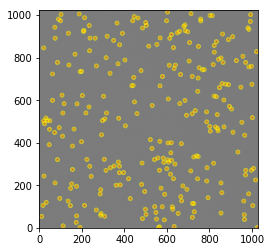

In [55]:
plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='red', lw=1.5, alpha=0.5)
plt.imshow(image, cmap='gray_r', origin='lower')
annulus_apertures.plot(color='yellow', lw=1.5, alpha=0.5)

In [56]:
>>> # create an IterativelySubtractedPSFPhotometry object
>>> from photutils.psf import IterativelySubtractedPSFPhotometry
>>> my_photometry = IterativelySubtractedPSFPhotometry(
...     finder=my_finder, group_maker=my_group_maker,
...     bkg_estimator=my_bkg_estimator, psf_model=my_psf_model,
...     fitter=my_fitter, niters=3, fitshape=(7,7))
>>> # get photometry results
>>> photometry_results = my_photometry(image=my_image)
>>> # get residual image
>>> residual_image = my_photometry.get_residual_image()

NameError: name 'my_finder' is not defined

In [57]:
>>> import numpy as np
>>> from astropy.table import Table
>>> from photutils.datasets import (make_random_gaussians_table,
...                                 make_noise_image,
...                                 make_gaussian_sources_image)
>>> sigma_psf = 2.0
>>> sources = Table()
>>> sources['flux'] = [700, 800, 700, 800]
>>> sources['x_mean'] = [12, 17, 12, 17]
>>> sources['y_mean'] = [15, 15, 20, 20]
>>> sources['x_stddev'] = sigma_psf*np.ones(4)
>>> sources['y_stddev'] = sources['x_stddev']
>>> sources['theta'] = [0, 0, 0, 0]
>>> sources['id'] = [1, 2, 3, 4]
>>> tshape = (32, 32)
>>> image = (make_gaussian_sources_image(tshape, sources) +
...          make_noise_image(tshape, type='poisson', mean=6.,
...                           random_state=1) +
...          make_noise_image(tshape, type='gaussian', mean=0.,
...                           stddev=2., random_state=1))

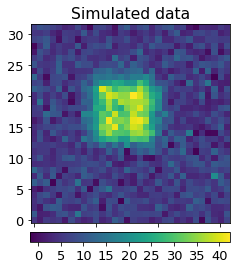

In [58]:
>>> from matplotlib import rcParams
>>> rcParams['font.size'] = 13
>>> import matplotlib.pyplot as plt
>>> plt.imshow(image, cmap='viridis', aspect=1, interpolation='nearest',
...            origin='lower') 
>>> plt.title('Simulated data') 
>>> plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04) 

In [59]:
>>> from photutils.detection import IRAFStarFinder
>>> from photutils.psf import IntegratedGaussianPRF, DAOGroup
>>> from photutils.background import MMMBackground, MADStdBackgroundRMS
>>> from astropy.modeling.fitting import LevMarLSQFitter
>>> from astropy.stats import gaussian_sigma_to_fwhm

In [60]:
>>> bkgrms = MADStdBackgroundRMS()
>>> std = bkgrms(image)
>>> iraffind = IRAFStarFinder(threshold=3.5*std,
...                           fwhm=sigma_psf*gaussian_sigma_to_fwhm,
...                           minsep_fwhm=0.01, roundhi=5.0, roundlo=-5.0,
...                           sharplo=0.0, sharphi=2.0)
>>> daogroup = DAOGroup(2.0*sigma_psf*gaussian_sigma_to_fwhm)
>>> mmm_bkg = MMMBackground()
>>> fitter = LevMarLSQFitter()
>>> psf_model = IntegratedGaussianPRF(sigma=sigma_psf)
>>> from photutils.psf import IterativelySubtractedPSFPhotometry
>>> photometry = IterativelySubtractedPSFPhotometry(finder=iraffind,
...                                                 group_maker=daogroup,
...                                                 bkg_estimator=mmm_bkg,
...                                                 psf_model=psf_model,
...                                                 fitter=LevMarLSQFitter(),
...                                                 niters=1, fitshape=(11,11))
>>> result_tab = photometry(image=image)
>>> residual_image = photometry.get_residual_image()

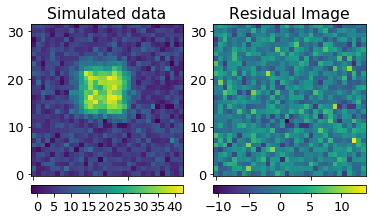

In [61]:
>>> plt.subplot(1, 2, 1)
>>> plt.imshow(image, cmap='viridis', aspect=1, interpolation='nearest',
               origin='lower')
>>> plt.title('Simulated data')
>>> plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
>>> plt.subplot(1 ,2, 2)
>>> plt.imshow(residual_image, cmap='viridis', aspect=1,
...            interpolation='nearest', origin='lower')
>>> plt.title('Residual Image')
>>> plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
>>> plt.show()

In [62]:
>>> psf_model.x_0.fixed = True
>>> psf_model.y_0.fixed = True
>>> pos = Table(names=['x_0', 'y_0'], data=[sources['x_mean'],
...                                         sources['y_mean']])

In [63]:
>>> photometry = BasicPSFPhotometry(group_maker=daogroup,
...                                 bkg_estimator=mmm_bkg,
...                                 psf_model=psf_model,
...                                 fitter=LevMarLSQFitter(),
...                                 fitshape=(11,11))
>>> result_tab = photometry(image=image, init_guesses=pos)
>>> residual_image = photometry.get_residual_image()

NameError: name 'BasicPSFPhotometry' is not defined

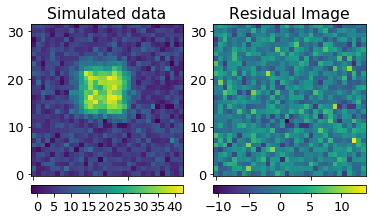

In [64]:
>>> plt.subplot(1, 2, 1)
>>> plt.imshow(image, cmap='viridis', aspect=1,
...            interpolation='nearest', origin='lower')
>>> plt.title('Simulated data')
>>> plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
>>> plt.subplot(1 ,2, 2)
>>> plt.imshow(residual_image, cmap='viridis', aspect=1,
...            interpolation='nearest', origin='lower')
>>> plt.title('Residual Image')
>>> plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)